## Effect of Expression Rewriting

Suppose we have the following different forms of polynomials:

$$
\begin{align*}
\mathrm{p}(x) &= (x - 1)^6 & := \mathrm{p}_1(x) \ \ \__\mathrm{(1)} \\
&= x^6 - 6x^5 + 15x^4 - 20x^3 +15x^2 - 6x + 1 & := \mathrm{p}_2(x) \ \ \__\mathrm{(2)} \\
&= 1 + x(-6 + x(15 + x(-20 + x(15 + x(-6 + x))))) & := \mathrm{p}_3(x) \ \ \__\mathrm{(3)}
\end{align*}
$$

where:
- $p_1(x)$ is written as a power of binomial.
- $p_2(x)$ is the expanded form of $p_1(x)$.
- $p_3(x)$ is the [Horner's form](https://en.wikipedia.org/wiki/Horner%27s_method) of $p_1(x)$, which is computationally efficient as it reduces the amount of multiplications (the powered terms like $x^n$)

In [2]:
p1(x) = (x .- 1).^6
p2(x) = x.^6 .- 6x.^5 .+ 15x.^4 -20x.^3 .+ 15x.^2 .- 6x .+ 1
p3(x) = 1 .+ x.*(-6 .+ x.*(15 .+ x.*(-20 .+ x.*(15 .+ x.*(-6 .+ x)))))

p3 (generic function with 1 method)

We want to compare the numerical result of these three, as follows:

In [3]:
typeof(0.995:0.0005:1.005)

StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}

In [4]:
using Plots

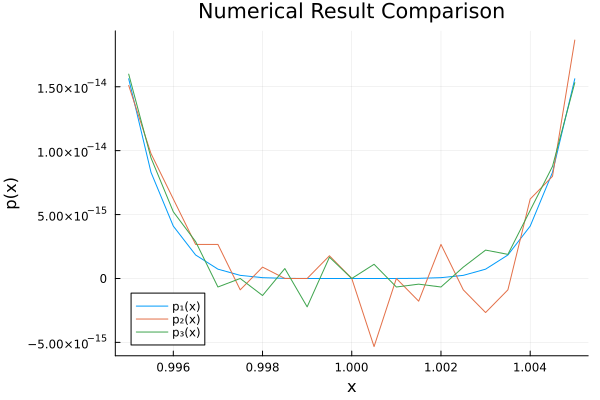

In [5]:
X = 0.995:0.0005:1.005
y1 = p1(X)
y2 = p2(X)
y3 = p3(X)

plot(
    X,
    y1,
    label="p₁(x)",
    title="Numerical Result Comparison",
    xlabel="x",
    ylabel="p(x)",
)
plot!(X, y2, label="p₂(x)")
plot!(X, y3, label="p₃(x)")

According to the plot, $p_1(x)$ is the most stable one, and $p_2(x)$ is the worst, but why?

## Mathematical Explanation

There are 3 possible numerical instabilities:

- Round-off error
- Overflow / Underflow
- Cancellation Error

Let's consider them one by one.

### Round-off error

All three are prone to round-off error because they are raised to an amount of power that can later amplify the round-off errer. Judging from the number of multiplying operations:

- $p_1(x)$ has 6 multiplying operations, by raising to the 6th power.
- $p_2(x)$ has 32 multiplying operations, powers and constant multiplications.
- $p_3(x)$ has 5 multiplying operations.

Therefore, $p_3(x)$ is the least prone to round-off error.

### Overflow / Underflow

$p_2(x)$ is the most prone to overflow/underflow errors because $x$ got raised before actually getting added to another terms. For example, given $x$ be some big number, just only $x^6$ can potentially lead to overflow because it got raised before doing anything. While the other terms like $6x^5$ may cause overflow by getting multiplied by 6.

$p_1(x)$ is the least one because the magnitude gets bigger only when multiplying at each iteration of powering. In other words, the size steadily increases like
$$(x-1) \rightarrow (x-1)^2 \rightarrow ... \rightarrow (x-1)^6$$

$p_3(x)$ is more prone to overflow/underflow than $p_1(x)$ as the number gets bigger a bit more quickly, but not as quick as $p_2$ since the power is not calculated in advanced. For example, given $x$ be some big number, it first gets subtracted in $-6 + x$, then multiplied by $x$ as in $x(-6+x)$, and it goes like this according to the parenthesis order. As you may notice that it got increases like $p_1(x)$, but the difference is that it gets added/subtracted in between. So there is a little more chance that adding or subtracting with a constant might cause overflow/underflow.

Therefore, $p_1(x)$ is the least prone to overflow/underflow error.

### Cancellation Error

- $p_1(x)$ is the least prone to cancellation error because it got subtracted only once from $x - 1$.
- $p_2(x)$ and $p_3(x)$ are alike in the number of *minus operators*, and are more prone to  cancellation error.

*Note: some of these summary got inspired by the answer from [the conversation with ChatGPT](https://chat.openai.com/share/acf2f2d6-ad41-404e-9c5f-e7b0a79b1573)*